In [1]:
__nbid__ = '0018'
__author__ = 'Brandon Matthews <brandonmatthews@my.unt.edu>, Ohad Shemmer <ohad.shemmer@unt.edu>, Cooper Dix <cooperdix@my.unt.edu>, David Herrera <david.herrera@noirlab.edu>, Astro Data Lab Team <datalab@noirlab.edu>'
__version__ = '20241205' # yyyymmdd
__datasets__ = ['gnirs_dqs']
__keywords__ = ['gemini llp', 'tap', 'file service', 'spectra', 'quasars']

# El Espectrógrafo Infrarrojo Cercano de Gemini - Survey de Cuásares Distantes (GNIRS-DQS)

*Brandon Matthews, Ohad Shemmer, Cooper Dix, & La Colaboración GNIRS-DQS*

#### (_Traducción de [GNIRS_DQS_DataAccessAtDataLab.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/GNIRS_DQS_SpectralInventory/GNIRS_DQS_DataAccessAtDataLab.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen del notebook](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [Acceso a los archivos de datos GNIRS-DQS](#access)
* [Lectura de las tablas](#tables)
* [Ejemplos de gráficas](#exampleplots)
* [Agradecimientos](#acks)
* [Recursos y referencias](#resources)

<a class="anchor" id="goals"></a>
# Objetivos
El inventario espectral de GNIRS-DQS se utiliza principalmente para desarrollar prescripciones que permitan obtener corrimientos al rojo, masas de agujeros negros y tasas de acreción más precisos y exactos para todos los cuásares. Además, las mediciones facilitan la comprensión de la dependencia de las propiedades espectrales en el marco de referencia ultravioleta-óptico de los cuásares con respecto al corrimiento al rojo, la luminosidad y la razón de Eddington, y ponen a prueba si las propiedades físicas del motor central de los cuásares evolucionan a lo largo del tiempo cósmico.  

Este notebook muestra:
- Cómo acceder a los datos de GNIRS-DQS desde Data Lab  
- Las tablas y columnas disponibles de GNIRS-DQS  
- Ejemplos de gráficas y espectros de GNIRS-DQS  

# Resumen
Presentamos mediciones espectroscópicas de 260 fuentes del Espectrógrafo Infrarrojo Cercano de Gemini - Survey de Cuásares Distantes (GNIRS-DQS). Siendo el mayor survey uniforme y homogéneo de su tipo, representa una muestra limitada por flujo (≲19.0 mag, ≲16.5 mag) de cuásares del Sloan Digital Sky Survey (SDSS) en 1.5 < z < 3.5 con una luminosidad monocromática (λLλ) en 5100Å en el rango de $10^{44}-10^{46}$ $\rm{erg}~ \rm{s}^{-1}$. Una combinación de los espectros de GNIRS y SDSS cubre las principales características de diagnóstico de cuásares, principalmente las líneas de emisión C IV λ1549, Mg II λ2798, λ2803, Hβ λ4861, y [O III] λ4959, λ5007, en cada fuente.  

Estos archivos de datos contienen cuatro tablas:

1.) Encabezados de columna para mediciones espectrales (`gnirs_dqs.spec_measurements`)  

2.) Encabezados de columna para mediciones suplementarias de líneas de emisión (`gnirs_dqs.spec_measurements_supp`), cuando están disponibles  

3.) Encabezados de columna para parámetros gaussianos de perfiles de líneas de emisión (`gnirs_dqs.gaussian_fit_parameters`)  

4.) Registro de observaciones de objetos GNIRS-DQS (`gnirs_dqs.obs_log`)  
      
Más información sobre cada tabla puede encontrarse más abajo en la sección "Lectura de las tablas" con su tabla correspondiente.  

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----



# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="import"></a>
# Importaciones y configuración

In [1]:
# Librerías estándar 
from getpass import getpass

# 3rd party # Eliminar importaciones que no son necesarias
import numpy as np
import pylab as plt
import pandas as pd
import matplotlib.pyplot as plt

# De Data Lab
from dl import queryClient as qc, storeClient as sc, authClient as ac
from dl.helpers.utils import convert

# Graficar
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['font.size'] = 16

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="access"></a>
# Acceso a los archivos de datos GNIRS-DQS

Todos los productos de datos GNIRS-DQS, en su forma original, residen en Data Lab en un servicio público VOSpacefile. La exploración del servicio de archivos y su contenido se realiza utilizando el Data Lab storeClient (importado como `sc`):  

In [3]:
print(sc.services('gnirs_dqs'))


                    name   svc   description
                --------   ----  --------
               gnirs_dqs   vos   Gemini Near-IR Spectroscopic-Distant Qua ...



El método `storeClient.ls()` lista el contenido del directorio de nivel superior. Esto listará los 260 archivos espectrales ASCII de GNIRS-DQS disponibles en el servicio de archivos:  

In [4]:
print(sc.ls('gnirs_dqs://',format='long'))

-rw-rw-r-x  gnirs_dqs  1110004  13 Jul 2022 08:32  001018.88+280932.5.txt
-rw-rw-r-x  gnirs_dqs  688348  13 Jul 2022 08:32  001249.89+285552.6.txt
-rw-rw-r-x  gnirs_dqs  679362  13 Jul 2022 08:32  001355.10-012304.0.txt
-rw-rw-r-x  gnirs_dqs  739027  13 Jul 2022 08:32  001453.20+091217.6.txt
-rw-rw-r-x  gnirs_dqs  1206255  13 Jul 2022 08:32  001813.30+361058.6.txt
-rw-rw-r-x  gnirs_dqs  1340447  13 Jul 2022 08:32  001914.46+155555.9.txt
-rw-rw-r-x  gnirs_dqs  1328127  13 Jul 2022 08:32  002634.46+274015.5.txt
-rw-rw-r-x  gnirs_dqs  820289  13 Jul 2022 08:32  003001.11-015743.5.txt
-rw-rw-r-x  gnirs_dqs  1141019  13 Jul 2022 08:32  003416.61+002241.1.txt
-rw-rw-r-x  gnirs_dqs  749562  13 Jul 2022 08:32  003853.15+333044.3.txt
-rw-rw-r-x  gnirs_dqs  737158  13 Jul 2022 08:32  004613.54+010425.7.txt
-rw-rw-r-x  gnirs_dqs  767293  13 Jul 2022 08:32  004710.48+163106.5.txt
-rw-rw-r-x  gnirs_dqs  936025  13 Jul 2022 08:32  004719.71+014813.9.txt
-rw-rw-r-x  gnirs_dqs  1019006  13 Jul 2022 08

Cargando los datos de un archivo particular del servicio de archivos GNIRS-DQS y convitiéndolos a un dataframe de Pandas:  

In [2]:
data = convert(sc.get(fr = 'gnirs_dqs://001914.46+155555.9.txt',to = ''),'pandas')
data

,wavelength,flux,Mg2_fit,Mg2_continuum,Fe3_fit,Mg2_gauss1,Mg2_gauss2,O2_fit,O2_continuum,O2_gauss1,...,Hb_gauss1,Hb_gauss2,Ha_fit,Ha_continuum,Ha_gauss1,Ha_gauss2,O3_4959_gauss1,O3_4959_gauss2,O3_5007_gauss1,O3_5007_gauss2
0,7266.0,1.009100e-16,2.254300e-16,2.254300e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,5.616800e-17,5.616800e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
1,7272.5,1.009100e-16,2.253100e-16,2.253100e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,5.615900e-17,5.615900e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
2,7782.2,2.174100e-16,2.138600e-16,2.064900e-16,7.362600e-18,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,5.485100e-17,5.485100e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
3,7801.8,2.487400e-17,2.130800e-16,2.056500e-16,7.434700e-18,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,5.479300e-17,5.479300e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
4,7805.1,2.487400e-17,2.129300e-16,2.055300e-16,7.402100e-18,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,5.478400e-17,5.478400e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,25255.0,1.133500e-17,-4.376200e-16,-4.376200e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,1.007000e-17,1.007000e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
3924,25261.0,1.432600e-17,-4.378600e-16,-4.378600e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,1.005300e-17,1.005300e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
3925,25268.0,1.432600e-17,-4.381000e-16,-4.381000e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,1.003600e-17,1.003600e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
3926,25274.0,1.322400e-17,-4.383400e-16,-4.383400e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,1.001900e-17,1.001900e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27


<a class="anchor" id="tables"></a>
# Lectura de las tablas

Los cuatro catálogos (así como 5 tablas cruzadas) están cargados en el servicio TAP de Data Lab como tablas consultables. Puedes interactuar con las tablas utilizando el Data Lab queryClient (importado como qc). Aquí listamos algo de información sobre la base de datos (también llamada "esquema"): 

In [6]:
print(qc.schema('gnirs_dqs'))


Schema: gnirs_dqs

      Table Name   Description
      ----------   -----------
gaussian_fit_parameters   Gaussian parameters of emission-line profiles
         obs_log   Observation log
spec_measurements   Spectral measurements
spec_measurements_supp   Supplementary spectral measurements
x1p5__spec_measurements__allwise__source   gnirs_dqs.spec_measurements and xmatch_std.allwise__source
                   crossmatch (1.5 arcsec)
x1p5__spec_measurements__gaia_dr3__gaia_source   gnirs_dqs.spec_measurements and gaia_dr3.gaia_source cross
                   match (1.5 arcsec)
x1p5__spec_measurements__nsc_dr2__object   gnirs_dqs.spec_measurements and xmatch_std.nsc_dr2__object
                   crossmatch (1.5 arcsec)
x1p5__spec_measurements__sdss_dr17__specobj   gnirs_dqs.spec_measurements and sdss_dr17.specobj crossmat
                   ch (1.5 arcsec)
x1p5__spec_measurements__unwise_dr1__object   gnirs_dqs.spec_measurements and xmatch_std.unwise_dr1__obj
                   ect cros

Más información sobre cada tabla:

In [3]:
for table in ('spec_measurements','spec_measurements_supp','gaussian_fit_parameters','obs_log'):
    print(qc.schema('gnirs_dqs.%s' % table))


Schema: gnirs_dqs
 Table: spec_measurements

     Column Name   Description
     -----------   -----------
          as_mg2   Asymmetry of Mg II double Gaussian fit profile
           as_hb   Asymmetry of Hbeta double Gaussian fit profile
           as_o3   Asymmetry of O III 5007A double Gaussian fit profile
           as_ha   Asymmetry of Halpha double Gaussian fit profile
            zsys   Systemic redshift
        kurt_mg2   Kurtosis of Mg II double Gaussian fit profile
         kurt_hb   Kurtosis of Hbeta double Gaussian fit profile
           ew_o3   Rest-frame O III 5007A emission line equivalent width
       upp_ew_o3   Upper uncertainty in EW_O3
       low_ew_o3   Lower uncertainty in EW_O3
         kurt_o3   Kurtosis of O III 5007A double Gaussian fit profile
         kurt_ha   Kurtosis of Halpha double Gaussian fit profile
          ew_fe2   Rest-frame Fe II emission line equivalent width
      upp_ew_fe2   Upper uncertainty of EW of Fe II
      low_ew_fe2   Lower uncertai

Cada tabla puede consultarse usando SQL (versión Postgres) o ADQL. Para el propósito de este notebook consultaremos y cargaremos las tablas completas. El método query del Data Lab queryClient puede convertir el resultado de la consulta en varios formatos al vuelo, por ejemplo, a un dataframe de Pandas, mostrado con cada tabla abajo.  

#### La tabla `spec_measurements`:  
Encabezados de columna para mediciones espectrales (`gnirs_dqs.spec_measurements`).  

    a.) Las mediciones del centro de línea (lc) se basan en el valor del pico del ajuste de la línea de emisión.  
    b.) La asimetría (as) se define aquí como la asimetría de los ajustes gaussianos, es decir, una medida de la asimetría de la distribución alrededor de su media, s = E(x − μ)^3/σ^3, donde μ es la media de x, σ es la desviación estándar de x, y E(t) es el valor esperado. La curtosis (kurt) es la cuantificación de las “colas” de los ajustes gaussianos definida como k = E(x − μ)^4/σ^4.  

In [4]:
spec_measurements_table = qc.query('select * from gnirs_dqs.spec_measurements',fmt='pandas')
print("Nombres de columnas:", spec_measurements_table.columns)
spec_measurements_table.head(10)  # primeras 10 líneas de la tabla

Nombres de columnas: Index(['ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'random_id', 'as_mg2',
       'as_hb', 'as_o3', 'as_ha', 'zsys', 'kurt_mg2', 'kurt_hb', 'ew_o3',
       'upp_ew_o3', 'low_ew_o3', 'kurt_o3', 'kurt_ha', 'ew_fe2', 'upp_ew_fe2',
       'low_ew_fe2', 'logf5100', 'logl5100', 'htm9', 'ring256', 'nest4096',
       'lc_mg2', 'lc_hb', 'fwhm_hb', 'upp_fwhm_hb', 'lc_o3', 'lc_ha',
       'fwhm_fe2', 'upp_lc_mg2', 'low_lc_mg2', 'fwhm_mg2', 'upp_fwhm_mg2',
       'low_fwhm_mg2', 'ew_mg2', 'upp_ew_mg2', 'low_ew_mg2', 'upp_lc_hb',
       'low_lc_hb', 'low_fwhm_hb', 'ew_hb', 'upp_ew_hb', 'low_ew_hb',
       'upp_lc_o3', 'low_lc_o3', 'fwhm_o3', 'upp_fwhm_o3', 'low_fwhm_o3',
       'upp_lc_ha', 'low_lc_ha', 'fwhm_ha', 'upp_fwhm_ha', 'low_fwhm_ha',
       'ew_ha', 'upp_ew_ha', 'low_ew_ha', 'obj'],
      dtype='object')


,ra,dec,elon,elat,glon,glat,random_id,as_mg2,as_hb,as_o3,...,low_fwhm_o3,upp_lc_ha,low_lc_ha,fwhm_ha,upp_fwhm_ha,low_fwhm_ha,ew_ha,upp_ew_ha,low_ew_ha,obj
0,263.467629,54.008469,252.637704,77.053746,81.638375,32.860363,16.161959,-0.8960,-0.61100,-0.3690,...,1,0,0,0,0,0,0,0,0,SDSS J173352.23+540030.4
1,244.926631,52.937060,215.686155,71.672100,81.639952,43.915871,31.438913,0.0000,0.00115,-0.0627,...,1110,1,1,5373,43,57,398,1,1,SDSS J161942.39+525613.4
2,236.459912,55.729506,198.134114,70.889836,87.685050,47.709089,27.054310,0.0000,-0.13800,-0.3270,...,1,1,1,2654,53,71,479,1,1,SDSS J154550.37+554346.2
3,228.782611,61.403322,176.566641,71.581697,98.021279,48.186865,66.735725,0.0000,0.05250,-0.6180,...,479,2,3,2951,28,37,393,1,1,SDSS J151507.82+612411.9
4,229.387889,43.946779,205.685872,58.664222,72.476687,56.237950,63.025940,0.0209,-0.05940,-0.0282,...,1,2,3,4154,36,47,368,1,1,SDSS J151733.09+435648.4
5,227.847116,49.850351,197.269485,63.053924,82.853780,54.952896,96.898870,0.0000,0.01320,0.0000,...,0,1,1,4627,66,88,472,1,1,SDSS J151123.30+495101.2
6,228.424542,46.500777,201.929969,60.500194,77.200046,56.006524,16.948517,0.0000,0.07050,-0.4860,...,1,1,2,4094,39,51,366,1,1,SDSS J151341.89+463002.7
7,214.966037,47.150368,186.749495,55.860708,87.907537,63.516802,89.232240,-0.5440,0.35600,-0.4000,...,1,3,4,3774,26,35,368,1,1,SDSS J141951.84+470901.3
8,216.149892,42.175127,192.624478,52.175577,77.351523,65.778656,93.082030,0.0000,-0.18100,-0.1410,...,1,2,3,5549,37,49,343,1,1,SDSS J142435.97+421030.4
9,216.430523,54.105374,179.660204,61.853399,96.706735,57.957154,91.641020,-0.8590,-0.04660,-0.2250,...,1,0,0,0,0,0,0,0,0,SDSS J142543.32+540619.3


#### La tabla `spec_measurements_supp`:

Encabezados de columna para Mediciones Suplementarias de Líneas de Emisión (`gnirs_dqs.spec_measurements_supp`), cuando están disponibles.

    a.) Mediciones espectrales para las líneas suplementarias Hδ, Hγ, [O II] λ3727 y [Ne III] λ3870  
    b.) Las mediciones del centro de línea (lc) se basan en el pico de la línea de emisión según el valor del ajuste del pico.


In [5]:
spec_measurements_supp_table = qc.query('select * from gnirs_dqs.spec_measurements_supp',fmt='pandas')
print("Nombres de columnas:", spec_measurements_supp_table.columns)
spec_measurements_supp_table.head(10)  # primeras 10 líneas de la tabla

Nombres de columnas: Index(['ra', 'dec', 'glon', 'glat', 'elon', 'elat', 'random_id', 'as_hd',
       'as_hg', 'as_o2', 'as_ne3', 'kurt_hd', 'kurt_hg', 'kurt_o2', 'kurt_ne3',
       'htm9', 'ring256', 'nest4096', 'lc_hd', 'lc_hg', 'lc_o2', 'upp_fwhm_o2',
       'lc_ne3', 'upp_lc_hd', 'low_lc_hd', 'fwhm_hd', 'upp_fwhm_hd',
       'low_fwhm_hd', 'ew_hd', 'upp_ew_hd', 'low_ew_hd', 'upp_lc_hg',
       'low_lc_hg', 'fwhm_hg', 'upp_fwhm_hg', 'low_fwhm_hg', 'ew_hg',
       'upp_ew_hg', 'low_ew_hg', 'upp_lc_o2', 'low_lc_o2', 'fwhm_o2',
       'low_fwhm_o2', 'ew_o2', 'upp_ew_o2', 'low_ew_o2', 'upp_lc_ne3',
       'low_lc_ne3', 'fwhm_ne3', 'upp_fwhm_ne3', 'low_fwhm_ne3', 'ew_ne3',
       'upp_ew_ne3', 'low_ew_ne3', 'obj'],
      dtype='object')


,ra,dec,glon,glat,elon,elat,random_id,as_hd,as_hg,as_o2,...,low_ew_o2,upp_lc_ne3,low_lc_ne3,fwhm_ne3,upp_fwhm_ne3,low_fwhm_ne3,ew_ne3,upp_ew_ne3,low_ew_ne3,obj
0,228.424542,46.500777,77.200046,56.006524,201.929969,60.500194,57.137966,0.0,0.00000,0.0183,...,1,3,4,3099,209,276,16,1,1,SDSS J151341.89+463002.7
1,214.966037,47.150368,87.907537,63.516802,186.749495,55.860708,55.706833,0.0,0.00000,0.0000,...,0,4,6,3290,342,452,6,1,1,SDSS J141951.84+470901.3
2,216.430523,54.105374,96.706735,57.957154,179.660204,61.853399,40.385242,0.0,0.00000,-0.0209,...,3,0,0,0,0,0,0,0,0,SDSS J142543.32+540619.3
3,216.251024,49.791460,90.890521,61.111939,185.099540,58.487826,98.947680,0.0,0.00000,0.0000,...,0,7,10,3487,4199,3487,12,39,12,SDSS J142500.24+494729.2
4,192.999614,50.034346,122.700661,67.093654,164.607614,49.522375,49.870150,0.0,0.00000,0.0000,...,0,1,1,5293,220,291,17,1,1,SDSS J125159.90+500203.6
5,184.402741,51.919529,135.051998,64.405377,156.321482,47.818830,97.685770,0.0,0.24700,0.0075,...,1,8,11,4485,220,291,21,4,5,SDSS J121736.65+515510.3
6,166.898256,64.335750,139.816479,49.249137,133.237371,51.991403,85.915115,0.0,0.00231,0.0000,...,0,10,13,3823,245,324,14,1,1,SDSS J110735.58+642008.6
7,146.113632,61.740170,151.399547,43.660343,123.556384,44.677914,71.668640,0.0,-0.05660,0.0000,...,0,2,3,4349,184,243,23,1,1,SDSS J094427.27+614424.6
8,134.944980,60.617275,155.267682,38.996746,117.521036,41.400867,85.699580,0.0,0.00000,0.0000,...,0,5,6,3932,198,261,14,1,1,SDSS J085946.79+603702.1
9,120.150063,50.178980,168.628420,31.306390,111.571455,28.973154,63.113670,0.0,0.00000,0.0000,...,0,9,12,3277,396,524,14,25,14,SDSS J080036.01+501044.3


#### La tabla `gaussian_fit_parameters`:

Encabezados de columna para los Parámetros Gaussianos de Perfiles de Líneas de Emisión (`gnirs_dqs.gaussian_fit_parameters`).

    Parámetros independientes del ajuste gaussiano para cada línea de emisión que fue ajustada con un perfil gaussiano angosto y ancho. El pico del perfil gaussiano se basa en el valor del ajuste del pico.

In [6]:
gaussian_fit_parameters_table = qc.query('select * from gnirs_dqs.gaussian_fit_parameters',fmt='pandas')
print("Nombres de columnas:", gaussian_fit_parameters_table.columns)
gaussian_fit_parameters_table.head(10)  # primeras 10 líneas de la tabla

Nombres de columnas: Index(['ra', 'dec', 'glon', 'glat', 'elon', 'elat', 'random_id', 'htm9',
       'ring256', 'nest4096', 'n_lp_mg2', 'n_std_mg2', 'n_fl_mg2', 'b_lp_mg2',
       'b_std_mg2', 'b_fl_mg2', 'n_lp_o2', 'n_std_o2', 'n_fl_o2', 'b_lp_o2',
       'b_std_o2', 'b_fl_o2', 'n_lp_ne3', 'n_std_ne3', 'n_fl_ne3', 'b_lp_ne3',
       'b_std_ne3', 'b_fl_ne3', 'n_lp_hd', 'n_std_hd', 'n_fl_hd', 'b_lp_hd',
       'b_std_hd', 'b_fl_hd', 'n_lp_hg', 'n_std_hg', 'n_fl_hg', 'b_lp_hg',
       'b_std_hg', 'b_fl_hg', 'n_lp_hb', 'n_std_hb', 'n_fl_hb', 'b_lp_hb',
       'b_std_hb', 'b_fl_hb', 'n_lp_o31', 'n_std_o31', 'n_fl_o31', 'b_lp_o31',
       'b_std_o31', 'b_fl_o31', 'n_lp_o32', 'n_std_o32', 'n_fl_o32',
       'b_lp_o32', 'b_std_o32', 'b_fl_o32', 'n_lp_ha', 'n_std_ha', 'n_fl_ha',
       'b_lp_ha', 'b_std_ha', 'b_fl_ha', 'obj'],
      dtype='object')


,ra,dec,glon,glat,elon,elat,random_id,htm9,ring256,nest4096,...,b_lp_o32,b_std_o32,b_fl_o32,n_lp_ha,n_std_ha,n_fl_ha,b_lp_ha,b_std_ha,b_fl_ha,obj
0,263.467629,54.008469,81.638375,32.860363,252.637704,77.053746,43.853910,3507700,75451,41263479,...,4995,25,9,0,0,0,0,0,0,SDSS J173352.23+540030.4
1,244.926631,52.937060,81.639952,43.915871,215.686155,71.672100,78.510450,3643465,79345,41566239,...,5002,54,2,6574,82,7,6567,263,5,SDSS J161942.39+525613.4
2,236.459912,55.729506,87.685050,47.709089,198.134114,70.889836,6.482603,3518105,67827,46523654,...,5002,30,8,6569,45,20,6564,160,10,SDSS J154550.37+554346.2
3,228.782611,61.403322,98.021279,48.186865,176.566641,71.581697,6.802385,3526209,47515,47046913,...,4996,29,5,6562,47,11,6575,152,7,SDSS J151507.82+612411.9
4,229.387889,43.946779,72.476687,56.237950,205.685872,58.664222,84.866940,3660100,120184,40600377,...,5020,30,5,6577,75,131,6580,202,50,SDSS J151733.09+435648.4
5,227.847116,49.850351,82.853780,54.952896,197.269485,63.053924,60.120230,3658330,92564,46262151,...,0,0,0,6570,71,6,6531,274,3,SDSS J151123.30+495101.2
6,228.424542,46.500777,77.200046,56.006524,201.929969,60.500194,85.601990,3661297,108703,46209262,...,5000,30,62,6573,75,343,6572,214,111,SDSS J151341.89+463002.7
7,214.966037,47.150368,87.907537,63.516802,186.749495,55.860708,26.206238,3616153,104970,43855700,...,5003,30,84,6574,67,364,6568,242,127,SDSS J141951.84+470901.3
8,216.149892,42.175127,77.351523,65.778656,192.624478,52.175577,36.007767,3658931,130152,43423740,...,4994,30,68,6578,108,276,6581,235,70,SDSS J142435.97+421030.4
9,216.430523,54.105374,96.706735,57.957154,179.660204,61.853399,29.335695,3613082,75350,46813941,...,4994,30,7,0,0,0,0,0,0,SDSS J142543.32+540619.3


Registro de Observaciones de Objetos GNIRS-DQS (`gnirs_dqs.obs_log`)

    a.) El valor z_SDSS se basa en la mejor medición disponible en SDSS DR16 (Lyke et al. 2020, Tabla D1, columna 27 “Z”).  
    b.) Varias fuentes tienen más de una observación, y por lo tanto múltiples filas en la tabla. Todos los datos de SDSS provienen de DR16.  
    c.) Los comentarios en la columna (com) representan:  
      [1] Al menos una exposición no cumplió con nuestros requisitos de condiciones de observación.  
      [2] La observación no logró proporcionar espectro de la fuente debido a mal clima, artefactos instrumentales u otras dificultades técnicas durante la observación.


In [7]:
obs_log_table = qc.query('select * from gnirs_dqs.obs_log',fmt='pandas')
print("Nombres de columnas:", obs_log_table.columns)
obs_log_table.head(10)  # primeras 10 líneas de la tabla

Nombres de columnas: Index(['ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'zsdss', 'jmag', 'hmag',
       'kmag', 'random_id', 'htm9', 'ring256', 'nest4096', 'netexp', 'com',
       'bal', 'rl', 'obj', 'obsdate', 'semester'],
      dtype='object')


,ra,dec,elon,elat,glon,glat,zsdss,jmag,hmag,kmag,...,htm9,ring256,nest4096,netexp,com,bal,rl,obj,obsdate,semester
0,253.450110,48.838650,236.135935,70.338723,75.283347,39.119035,2.249,16.18,15.44,15.01,...,3639202,96979,41006359,920,2,0,0,SDSS J165348.02+485019.0,2018 May 13,2018A
1,263.467629,54.008469,252.637704,77.053746,81.638375,32.860363,3.424,15.87,15.72,14.95,...,3507700,75451,41263479,1190,0,0,0,SDSS J173352.23+540030.4,2015 Mar 23,2015A
2,263.467629,54.008469,252.637704,77.053746,81.638375,32.860363,3.424,15.87,15.72,14.95,...,3507700,75451,41263479,680,0,0,0,SDSS J173352.23+540030.4,2015 Apr 01,2015A
3,244.926631,52.937060,215.686155,71.672100,81.639952,43.915871,2.345,15.55,14.83,13.95,...,3643465,79345,41566239,1800,0,0,1,SDSS J161942.39+525613.4,2019 Apr 24,2019A
4,239.892800,59.008770,194.685425,74.513585,90.929093,44.686614,1.601,16.54,15.52,15.12,...,3517195,56559,47322581,1720,2,0,0,SDSS J155934.26+590031.6,2020 Jun 14,2020A
5,237.281110,56.946020,196.552345,72.087796,89.041118,46.792656,1.603,16.56,15.76,15.33,...,3518270,63481,46529838,1800,2,0,0,SDSS J154907.47+565645.7,2020 Aug 01,2020A
6,236.459912,55.729506,198.134114,70.889836,87.685050,47.709089,2.158,16.15,15.49,14.99,...,3518105,67827,46523654,920,1,1,0,SDSS J154550.37+554346.2,2018 Jul 31,2018A
7,228.782611,61.403322,176.566641,71.581697,98.021279,48.186865,2.182,16.74,15.58,15.23,...,3526209,47515,47046913,1800,0,0,0,SDSS J151507.82+612411.9,2020 Jun 14,2020A
8,229.387889,43.946779,205.685872,58.664222,72.476687,56.237950,2.197,16.56,15.99,15.24,...,3660100,120184,40600377,1800,0,0,0,SDSS J151733.09+435648.4,2020 Jun 04,2020A
9,227.847116,49.850351,197.269485,63.053924,82.853780,54.952896,2.400,16.09,15.47,14.77,...,3658330,92564,46262151,1800,0,1,0,SDSS J151123.30+495101.2,2019 Apr 24,2019A


<a class="anchor" id="exampleplots"></a>
# Ejemplo de gráficos

Graficando la intensidad de la línea [O III] λ5007 contra la intensidad de la emisión en la región Fe II, con un umbral para Hβ EW. Esta es una mirada preliminar para explorar el "Autovector 1", la anticorrelación que existe entre la intensidad de Fe II y [O III] (Boroson & Greene 1992).

**NOTA:** Debido a un error en los archivos de datos de GNIRS-DQS, algunos de los siguientes valores son menores que 0 al tomar el log10. Hemos establecido temporalmente estos valores negativos en 0.

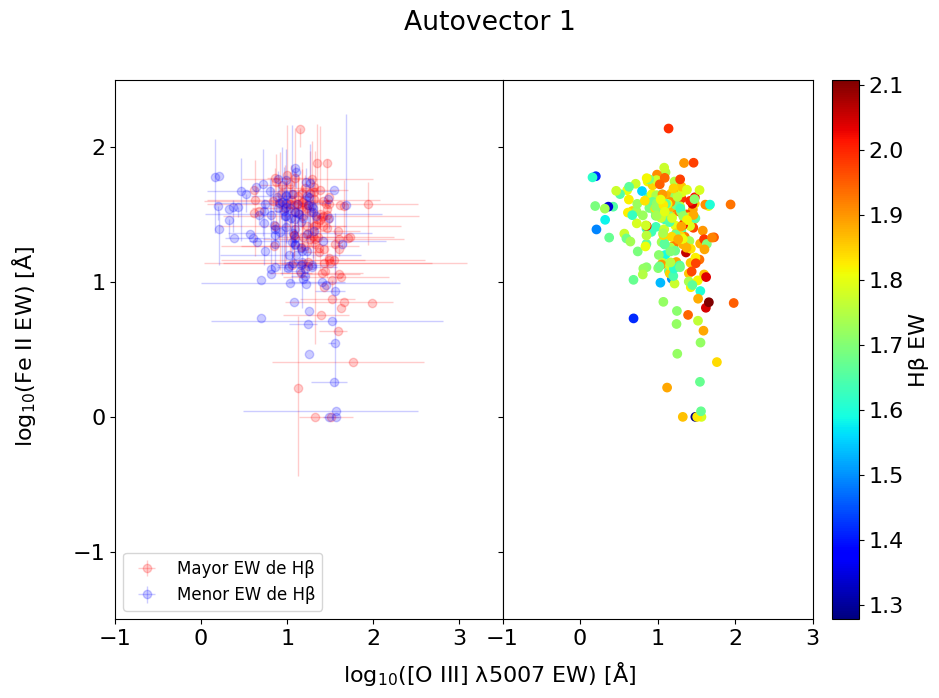

In [8]:
# Llamando a todos los datos
fe2_ew = np.log10(spec_measurements_table['ew_fe2'])
u_fe2ew = np.log10(spec_measurements_table['upp_ew_fe2'])
l_fe2ew = np.log10(spec_measurements_table['low_ew_fe2'])
o3_ew = np.log10(spec_measurements_table['ew_o3'])
u_o3ew = np.log10(spec_measurements_table['upp_ew_o3'])
l_o3ew = np.log10(spec_measurements_table['low_ew_o3'])
idx = np.power(10,o3_ew) > 1.0 # Umbral detectable de [O III]
fe2_ew = fe2_ew[idx]
u_fe2ew = u_fe2ew[idx]
l_fe2ew = l_fe2ew[idx]
o3_ew = o3_ew[idx]
u_o3ew = u_o3ew[idx]
l_o3ew = l_o3ew[idx]
hb_ew = np.log10(spec_measurements_table['ew_hb'])
hb_ew = hb_ew[idx]

o3_ew[o3_ew<0] = 0
u_o3ew[u_o3ew<0] = 0
l_o3ew[l_o3ew<0] = 0
fe2_ew[fe2_ew<0] = 0
u_fe2ew[u_fe2ew<0] = 0
l_fe2ew[l_fe2ew<0] = 0

# Dividiendo la muestra en dos según Hβ EW
big_hb = [o3_ew[hb_ew>np.median(hb_ew)],fe2_ew[hb_ew>np.median(hb_ew)]]
big_err = [u_o3ew[hb_ew>np.median(hb_ew)],l_o3ew[hb_ew>np.median(hb_ew)],u_fe2ew[hb_ew>np.median(hb_ew)],l_fe2ew[hb_ew>np.median(hb_ew)]]
small_hb = [o3_ew[hb_ew<=np.median(hb_ew)],fe2_ew[hb_ew<=np.median(hb_ew)]]
small_err = [u_o3ew[hb_ew<=np.median(hb_ew)],l_o3ew[hb_ew<=np.median(hb_ew)],u_fe2ew[hb_ew<=np.median(hb_ew)],l_fe2ew[hb_ew<=np.median(hb_ew)]]

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle("Autovector 1")
fig.text(0.5, 0.02, 'log$_{10}$([O III] λ5007 EW) [Å]', ha='center')
fig.text(0.02, 0.5, 'log$_{10}$(Fe II EW) [Å]', va='center', rotation='vertical')
ax1.errorbar(big_hb[0],big_hb[1], xerr=(big_err[1], big_err[0]), yerr=(big_err[3], big_err[2]), label='Mayor EW de Hβ', lw=1, fmt="o", c='r', alpha=0.2)
ax1.errorbar(small_hb[0],small_hb[1], xerr=(small_err[1], small_err[0]), yerr=(small_err[3], small_err[2]), label='Menor EW de Hβ', lw=1, fmt="o", c='b', alpha=0.2)
ax1.legend(loc='lower left', prop={'size': 12})
ax1.set_xlim([-1,3.5])
ax1.set_xticks([-1,0,1,2,3])
ax1.set_ylim([-1.5,2.5])
ax2.set_yticks([-1,0,1,2])
cm = plt.colormaps.get_cmap('jet')
plt.scatter(o3_ew,fe2_ew, c=hb_ew, cmap=cm)
cbar = plt.colorbar()
cbar.set_label('Hβ EW')
ax2.set_xlim([-1,3])
ax2.set_xticks([-1,0,1,2,3])
ax2.set_ylim([-1.5,2.5])
plt.show()

Graficando un espectro de ejemplo con los ajustes de la línea de emisión Hα provistos en GNIRS-DQS. Esto demuestra cómo los archivos csv individuales de cuásares pueden utilizarse para explorar las propiedades espectrales de una fuente dada:

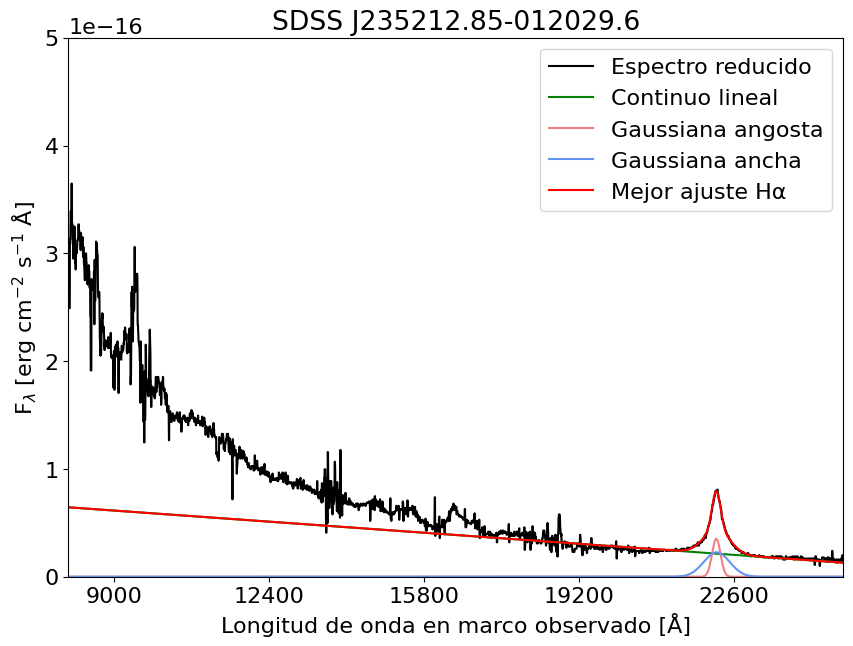

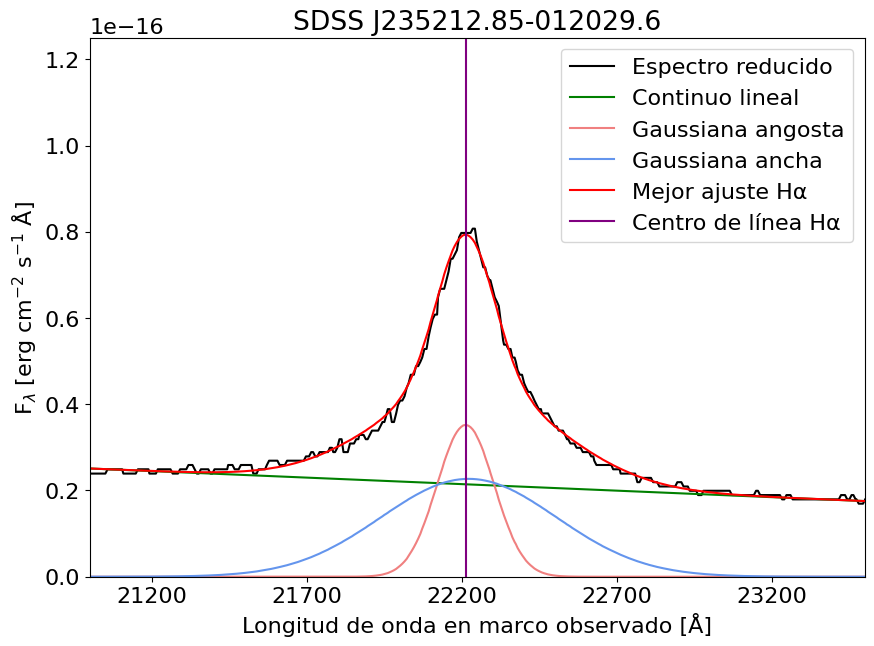

In [9]:
# Llamando a un objeto específico
data = convert(sc.get(fr = 'gnirs_dqs://235212.85-012029.6.txt',to = ''),'pandas')
idx = spec_measurements_table.obj == "SDSS J235212.85-012029.6"
wl = data.wavelength
fl = data.flux

plt.figure(1)
plt.title("SDSS J235212.85-012029.6")
plt.xlabel("Longitud de onda en marco observado [Å]")
plt.ylabel("F$_{λ}$ [erg cm$^{-2}$ s$^{-1}$ Å]")
plt.plot(wl,fl,c='k', label='Espectro reducido')
plt.plot(wl,data.Ha_continuum,c='g', label='Continuo lineal')
plt.plot(wl,data.Ha_gauss1,c='lightcoral', label='Gaussiana angosta')
plt.plot(wl,data.Ha_gauss2,c='cornflowerblue', label='Gaussiana ancha')
plt.plot(wl,data.Ha_fit,c='r', label='Mejor ajuste Hα')
plt.legend(loc='upper right')
plt.xlim([8000, 25000])
plt.xticks([9000, 12400, 15800, 19200, 22600])
plt.ylim([0,5e-16])
#Zoomed in view of just the Hα feature
plt.figure(2)
plt.title("SDSS J235212.85-012029.6")
plt.xlabel("Longitud de onda en marco observado [Å]")
plt.ylabel("F$_{λ}$ [erg cm$^{-2}$ s$^{-1}$ Å]")
plt.xlim([21000,23500])
plt.ylim([0,1.25e-16])
plt.plot(wl,fl,c='k', label='Espectro reducido')
plt.plot(wl,data.Ha_continuum,c='g', label='Continuo lineal')
plt.plot(wl,data.Ha_gauss1,c='lightcoral', label='Gaussiana angosta')
plt.plot(wl,data.Ha_gauss2,c='cornflowerblue', label='Gaussiana ancha')
plt.plot(wl,data.Ha_fit,c='r', label='Mejor ajuste Hα')
plt.axvline(float(spec_measurements_table.lc_ha.loc[idx].squeeze()), c='purple', label='Centro de línea Hα')
plt.legend(loc='upper right')
plt.xticks([21200, 21700, 22200, 22700, 23200])
plt.show()

<a class="anchor" id="acks"></a>
# Agradecimientos

* Este trabajo está financiado por las subvenciones de la National Science Foundation AST-1815281 (B. M. M., C. D., O. S.) y AST-1815645 (M. S. B., A. D. M.). W.N.B. agradece el apoyo de la subvención NSF AST-2106990.

* Este trabajo fue posible gracias a observaciones realizadas desde el telescopio Gemini North, ubicado dentro de la Maunakea Science Reserve y adyacente a la cima de Maunakea. Agradecemos el privilegio de observar el Universo desde un lugar que es único tanto por su calidad astronómica como por su importancia cultural.

<a class="anchor" id="resources"></a>
# Recursos y referencias

Boroson, T. A. & Green, R. F. 1992, ApJS, 80, 109. "The Emission-Line Properties of Low-Redshift Quasi-stellar Objects":
http://adsabs.harvard.edu/doi/10.1086/191661

Matthews, B. M., Shemmer, O., Dix, C., et al. 2021, ApJS,
252, 15. "Placing High-redshift Quasars in Perspective: A Catalog of Spectroscopic Properties from the Gemini Near Infrared Spectrograph-Distant Quasar Survey": http://adsabs.harvard.edu/doi/10.3847/1538-4365/abc705

GNIRS cross-dispersed data reduction: http://www.gemini.edu/instrumentation/gnirs/data-reduction

Gemini Data Archive: https://archive.gemini.edu/searchform For GNIRS-DQS, search program ID GN-20XXX-LP-16, where XXX spans:
17B, 18A, 18B, 19A, 19B, 20A, 20B